<a href="https://colab.research.google.com/github/rsmani84/Conductometric-Titration-of-simple-acid-Vs-Base/blob/main/Conductometric_titration_of_NaOH_Vs_HCl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter concentration of HCl (N): 0.05


/tmp/ipython-input-81000650.py:70: RankWarning: Polyfit may be poorly conditioned
  p2 = np.polyfit(x2, y2, 1)


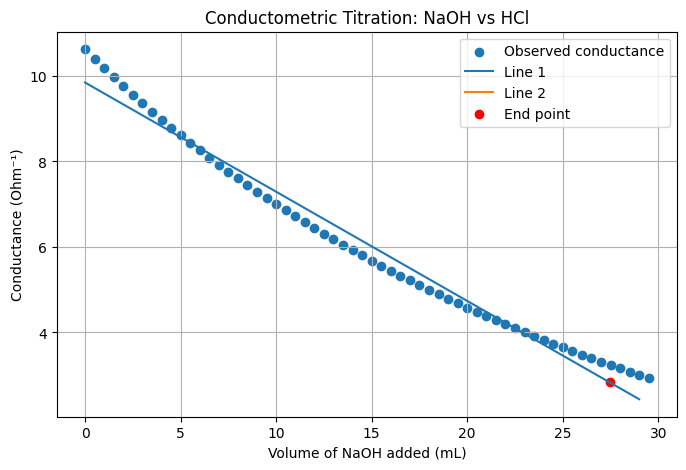

Equivalence volume of NaOH = 27.47 mL
Calculated strength of HCl = 0.0343 N


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# STUDENT INPUT SECTION
# -----------------------------
C_HCl = float(input("Enter concentration of HCl (N): "))
C_NaOH = 0.025 # Changed NaOH concentration to 0.025 N to observe effect

V_HCl = 20  # mL (given in beaker)
V_water = 20  # mL dilution
V_total_initial = V_HCl + V_water

# NaOH volume range (burette)
V_NaOH_added = np.arange(0, 30, 0.5)

# Ionic conductivities (relative values)
lambda_H = 350
lambda_OH = 200
lambda_Na = 50
lambda_Cl = 75

conductance = []

# -----------------------------
# CONDUCTANCE CALCULATION
# -----------------------------
moles_H_initial = C_HCl * V_HCl / 1000

for Vb in V_NaOH_added:
    moles_OH_added = C_NaOH * Vb / 1000

    if moles_OH_added < moles_H_initial:
        H_remaining = moles_H_initial - moles_OH_added
        OH_excess = 0
    else:
        H_remaining = 0
        OH_excess = moles_OH_added - moles_H_initial

    Na = moles_OH_added
    Cl = moles_H_initial

    V_total = (V_total_initial + Vb) / 1000

    k = (lambda_H * H_remaining +
         lambda_OH * OH_excess +
         lambda_Na * Na +
         lambda_Cl * Cl) / V_total

    conductance.append(k)

conductance = np.array(conductance)

# -----------------------------
# FIND EQUIVALENCE POINT
# -----------------------------
eq_index = np.argmin(conductance)
V_eq = V_NaOH_added[eq_index]

# Split data for two straight lines
x1 = V_NaOH_added[:eq_index]
y1 = conductance[:eq_index]

x2 = V_NaOH_added[eq_index:]
y2 = conductance[eq_index:]

# Linear fit
p1 = np.polyfit(x1, y1, 1)
p2 = np.polyfit(x2, y2, 1)

# Intersection point
x_intersect = (p2[1] - p1[1]) / (p1[0] - p2[0])
y_intersect = p1[0] * x_intersect + p1[1]

# -----------------------------
# CALCULATE STRENGTH OF HCl
# Using N1V1 = N2V2
# -----------------------------
N_HCl_calculated = (C_NaOH * x_intersect) / V_HCl

# -----------------------------
# PLOT GRAPH
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(V_NaOH_added, conductance, label="Observed conductance")
plt.plot(x1, np.polyval(p1, x1), label="Line 1")
plt.plot(x2, np.polyval(p2, x2), label="Line 2")
plt.scatter(x_intersect, y_intersect, color='red', label="End point")

plt.xlabel("Volume of NaOH added (mL)")
plt.ylabel("Conductance (Ohm⁻¹)")
plt.title("Conductometric Titration: NaOH vs HCl")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# OUTPUT RESULTS
# -----------------------------
print(f"Equivalence volume of NaOH = {x_intersect:.2f} mL")
print(f"Calculated strength of HCl = {N_HCl_calculated:.4f} N")

Enter concentration of HCl (N): 0.05
Enter concentration of NaOH (N): 0.1


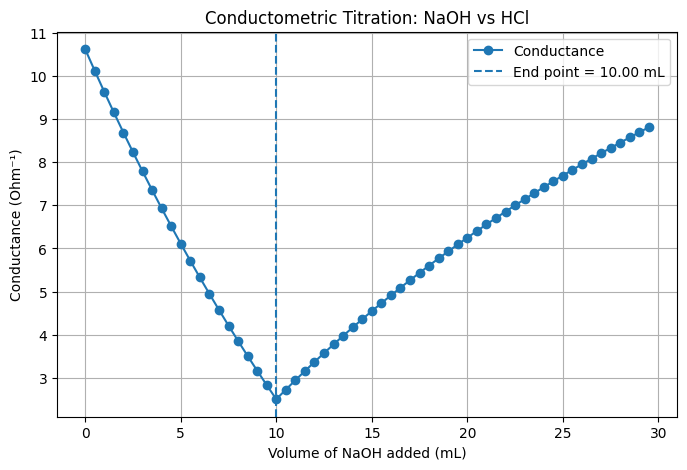


------ RESULTS ------
Volume of NaOH at equivalence (V1) = 10.00 mL
Strength of NaOH (N1) = 0.1000 N
Volume of HCl taken (V2) = 20 mL

Strength of HCl (N2) = 0.0500 N
Strength of HCl = 1.8225 g/L
Amount of HCl in given solution = 0.0365 g


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# STUDENT INPUT
# -----------------------------
C_HCl = float(input("Enter concentration of HCl (N): "))
C_NaOH = float(input("Enter concentration of NaOH (N): "))

V_HCl = 20  # mL taken in beaker
V_water = 20  # dilution
V_total_initial = V_HCl + V_water

# NaOH added from burette
V_NaOH_added = np.arange(0, 30, 0.5)

# Ionic conductivities (relative)
lambda_H = 350
lambda_OH = 200
lambda_Na = 50
lambda_Cl = 75

conductance = []

# Initial moles of HCl
moles_H_initial = C_HCl * V_HCl / 1000

# -----------------------------
# CONDUCTANCE CALCULATION
# -----------------------------
for Vb in V_NaOH_added:
    moles_OH_added = C_NaOH * Vb / 1000

    if moles_OH_added < moles_H_initial:
        H_remaining = moles_H_initial - moles_OH_added
        OH_excess = 0
    else:
        H_remaining = 0
        OH_excess = moles_OH_added - moles_H_initial

    Na = moles_OH_added
    Cl = moles_H_initial

    V_total = (V_total_initial + Vb) / 1000

    k = (lambda_H * H_remaining +
         lambda_OH * OH_excess +
         lambda_Na * Na +
         lambda_Cl * Cl) / V_total

    conductance.append(k)

conductance = np.array(conductance)

# -----------------------------
# FIND EQUIVALENCE POINT
# -----------------------------
eq_index = np.argmin(conductance)
V_eq = V_NaOH_added[eq_index]

# -----------------------------
# GRAPH
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(V_NaOH_added, conductance, 'o-', label="Conductance")
plt.axvline(V_eq, linestyle='--', label=f"End point = {V_eq:.2f} mL")

plt.xlabel("Volume of NaOH added (mL)")
plt.ylabel("Conductance (Ohm⁻¹)")
plt.title("Conductometric Titration: NaOH vs HCl")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# CALCULATIONS (AS PER RECORD)
# -----------------------------
# N1 V1 = N2 V2
# N1 = NaOH, V1 = NaOH at equivalence
# N2 = HCl, V2 = HCl taken (20 mL)

N1 = C_NaOH
V1 = V_eq
V2 = V_HCl

N2_calculated = (N1 * V1) / V2

# Strength of HCl (g/L)
Eq_wt_HCl = 36.45
Strength_HCl_g_per_L = N2_calculated * Eq_wt_HCl

# Amount of HCl in given solution (as in your sheet)
Amount_HCl_in_given = (Strength_HCl_g_per_L * V2) / 1000

# -----------------------------
# OUTPUT
# -----------------------------
print("\n------ RESULTS ------")
print(f"Volume of NaOH at equivalence (V1) = {V1:.2f} mL")
print(f"Strength of NaOH (N1) = {N1:.4f} N")
print(f"Volume of HCl taken (V2) = {V2} mL")

print(f"\nStrength of HCl (N2) = {N2_calculated:.4f} N")
print(f"Strength of HCl = {Strength_HCl_g_per_L:.4f} g/L")
print(f"Amount of HCl in given solution = {Amount_HCl_in_given:.4f} g")
